In [1]:
%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation

display(HTML('<script> $(document).ready(function() { $("div.input").hide(); }); </script>'))

## Funzioni di trasferimento

Nell'esempio seguente, daremo uno sguardo alla formulazione delle funzioni di trasferimento. Sebbene siano utilizzate in vari campi, nella teoria del controllo le funzioni di trasferimento descrivono le caratteristiche di trasferimento di frequenza di un sistema lineare tempo-invariante (LTI).

Generalmente, una funzione di trasferimento descrive la relazione tra la trasformata di Laplace dei segnali $u(t)$ in ingresso e i segnali $y(t)$ in uscita:

$$U(s)=\mathcal{L}\{u(t)\} \quad Y(s)=\mathcal{L}\{y(t)\}$$

$$Y(s)=G(s)U(s)$$

<img src="Images/tf.png" width="30%" />

Nel caso dei sistemi LTI, la funzione di trasferimento può essere descritta come una frazione di due polinomi:

$$G(s)=\frac{\sum\limits_{j=0}^{m}b_js^j}{\sum\limits_{i=0}^{n}a_is^i},$$

dove il denominatore $a(s)$ è il polinomio caratteristico del sistema.
<br>Normalizzando i componenti in $a^n=1$, le forme risultanti sono:

$$a(s) = s^n + a_{n-1}s^{n-1} + a_{n-2}s^{n-2} + ... + a_1s^1 + a_0$$
$$b(s) = b_ms^m + b_{m-1}s^{m-1} + b_{m-2}s^{m-2} + ... + b_1s^1 + b_0$$

Per i sistemi fisici, il grado del numeratore è inferiore al grado del denominatore; questo tipo è chiamato funzione di trasferimento strettamente propria. In questo caso, la funzione di trasferimento converge a zero all'infinito.


<br><b>Assembla una funzione di trasferimento selezionando i termini polinomiali!</b>

In [2]:
b = {}
a = {}

b[0] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[1] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[2] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[3] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[4] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))

a[0] = w.FloatText(value=10.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[1] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[2] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[3] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[4] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[5] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))

def transfer_function(a0, a1, a2, a3, a4, a5, b0, b1, b2, b3, b4):

    b1c = b1
    b2c = b2
    b3c = b3
    b4c = b4
    
    global b
    
    if a5 == 0:
        b[4].disabled=True
        b4c = 0
    else:
        b[4].disabled=False
        
    if a5 == 0 and a4==0:
        b[3].disabled=True
        b3c = 0
    else:
        b[3].disabled=False    
        
    if a5 == 0 and a4 == 0 and a3 == 0:
        b[2].disabled=True
        b2c = 0
    else:
        b[2].disabled=False    
        
    if a5 == 0 and a4 == 0 and a3 == 0 and a2 == 0:
        b[1].disabled=True
        b1c = 0
    else:
        b[1].disabled=False   
    
    G = c.tf([b4c, b3c, b2c, b1c, b0], [a5, a4, a3, a2, a1, a0]) # Transfer function

    print('Funzione di trasferimento:')
    print(G)

input_data = w.interactive_output(transfer_function, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3], 'a4':a[4], 'a5':a[5],
                                                      'b0':b[0], 'b1':b[1], 'b2':b[2], 'b3':b[3], 'b4':b[4]})

display(w.HBox([w.VBox([w.Label('$G(s)=$')], layout=w.Layout(justify_content="center", align_items='flex-start')),
        w.VBox([w.HBox([b[4], w.Label('$s^4+$'), b[3], w.Label('$s^3+$'), b[2], w.Label('$s^2+$'),
                    b[1], w.Label('$s+$'), b[0]], layout=w.Layout(justify_content='center')),
                    w.HBox([w.HTML(value='<hr style="border-top: 1px solid black">', layout=w.Layout(width='100%'))],
                           layout=w.Layout(justify_content='center')),
                    w.HBox([a[5], w.Label('$s^5+$'), a[4], w.Label('$s^4+$'), a[3], w.Label('$s^3+$'), a[2], w.Label('$s^2+$'),
                    a[1], w.Label('$s+$'), a[0]], layout=w.Layout(justify_content='center')) ],
               layout=w.Layout(width='70%'))], layout=w.Layout(justify_content='center') ), input_data)

Output()

Le soluzioni dei polinomi del numeratore e del denominatore sono chiamate rispettivamente zeri e poli del sistema. Possono essere utilizzati per determinare la stabilità del sistema e valutarne le prestazioni.

Sia gli zeri che i poli sono numeri reali o coppie coniugate complesse (se le equazioni differenziali del sistema sono a valori reali).

<br><b>Sperimenta variando i termini polinomiali e osserva i cambiamenti dei poli e zeri nel grafico!</b>

<IPython.core.display.Javascript object>


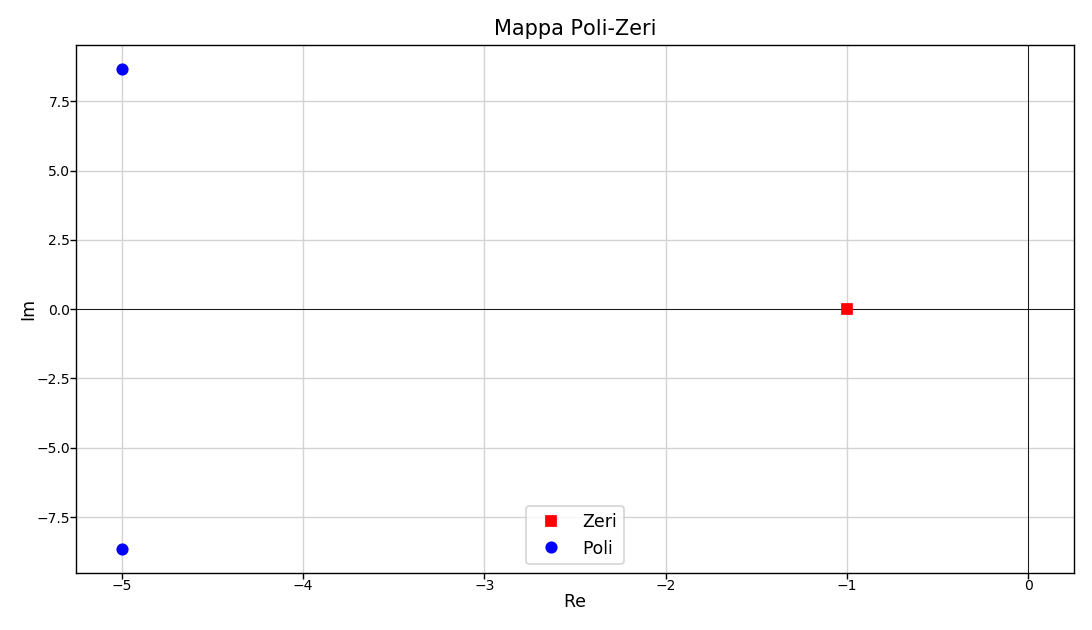

Output()

In [3]:
fig1, (f1_ax1) = plt.subplots(1, 1)
fig1.set_size_inches((5, 5))
fig1.set_tight_layout(True)

f1_line1, = f1_ax1.plot([], [], 'rs')
f1_line2, = f1_ax1.plot([], [], 'bo') 

f1_ax1.axhline(y=0, color='k', lw=0.5)
f1_ax1.axvline(x=0, color='k', lw=0.5)

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax1.autoscale(enable=True, axis='both')

f1_ax1.set_title('Mappa Poli-Zeri', fontsize=12)
f1_ax1.set_xlabel('Re', labelpad=0, fontsize=10)
f1_ax1.set_ylabel('Im', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax1.legend([f1_line1, f1_line2], ['Zeri', 'Poli'])

def pz_map(a0, a1, a2, a3, a4, a5, b0, b1, b2, b3, b4):
    
    b1c = b1
    b2c = b2
    b3c = b3
    b4c = b4
    
    if a5 == 0:
        b4c = 0
        
    if a5 == 0 and a4==0:
        b3c = 0
    
    if a5 == 0 and a4 == 0 and a3 == 0:
        b2c = 0
   
    if a5 == 0 and a4 == 0 and a3 == 0 and a2 == 0:
        b1c = 0

    G = c.tf([b4c, b3c, b2c, b1c, b0], [a5, a4, a3, a2, a1, a0]) # Transfer function
    
    p = c.pole(G)  # Poles
    z = c.zero(G)  # Zeros
    
    px = [x.real for x in p] 
    py = [x.imag for x in p]
    
    zx = [x.real for x in z]
    zy = [x.imag for x in z]
    
    global f1_line1, f1_line2
    
    try:
        f1_ax1.lines.remove(f1_line1)
        f1_ax1.lines.remove(f1_line2)
    except:
        pass
    
    f1_line1, = f1_ax1.plot(zx, zy, 'rs') 
    f1_line2, = f1_ax1.plot(px, py, 'bo')
    
    f1_ax1.relim()
    f1_ax1.autoscale_view()
    
    
    
w.interactive_output(pz_map, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3], 'a4':a[4], 'a5':a[5],
                              'b0':b[0], 'b1':b[1], 'b2':b[2], 'b3':b[3], 'b4':b[4]})

La controparte nel dominio del tempo della funzione di trasferimento è la risposta all'impulso: $g(t)$. Poiché la trasformata di Laplace della funzione delta di Dirac è la costante 1, la funzione di trasferimento di un sistema LTI può essere collegata alla sua risposta all'impulso.

$$\mathcal{L}\{\delta(t)\} = 1$$

$$1\cdot G(s) \; \xrightarrow{\mathcal{L}^{-1}} \; \delta(t)*g(t)$$

$$Y(s) = G(s)U(s) \; \xrightarrow{\mathcal{L}^{-1}} \; y(t) = \int\limits_{-\infty}^{\infty}g(t-\tau)u(\tau) d\tau,$$

dove, secondo le regole di trasformazione di Laplace, la moltiplicazione nel dominio della frequenza è abbinata alla convoluzione nel dominio del tempo e la convoluzione di una funzione con il delta di Dirac restituisce la stessa funzione.

<br><b>Osserva i cambiamenti nella risposta all'impulso per varie configurazioni!</b>

<IPython.core.display.Javascript object>


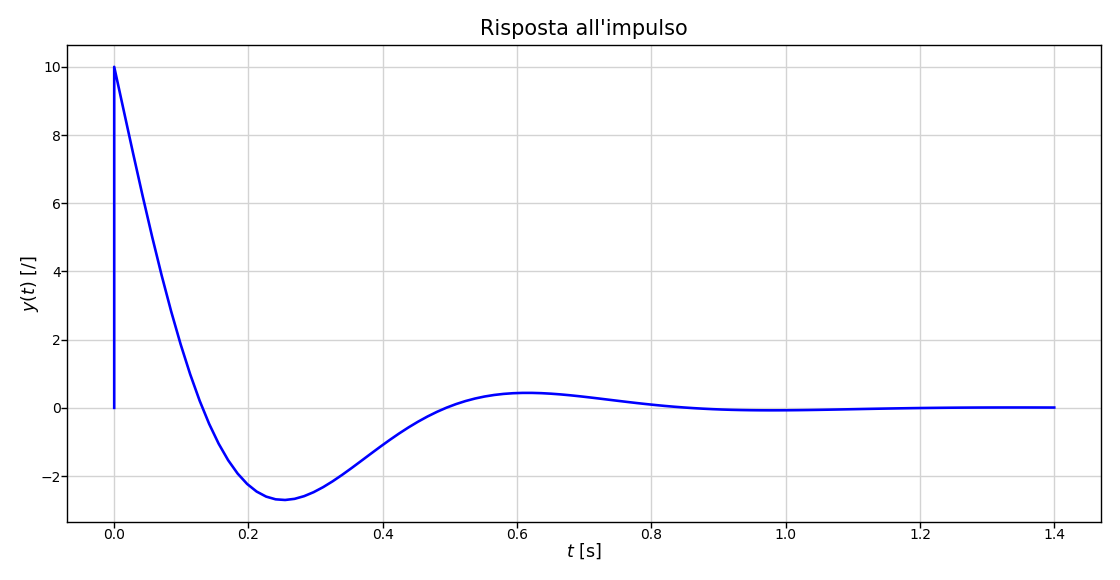

Output()

In [4]:
fig2, (f2_ax1) = plt.subplots(1, 1)
fig2.set_size_inches((9.8, 5))
fig2.set_tight_layout(True)

f2_line1, = f2_ax1.plot([], [])

f2_ax1.grid(which='both', axis='both', color='lightgray')
f2_ax1.autoscale(enable=True, axis='both')

f2_ax1.set_title('Risposta all\'impulso', fontsize=12)
f2_ax1.set_xlabel(r'$t$ [s]', labelpad=0, fontsize=10)
f2_ax1.set_ylabel(r'$y(t)$ [/]', labelpad=0, fontsize=10)
f2_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

def inp_resp(a0, a1, a2, a3, a4, a5, b0, b1, b2, b3, b4):
    
    b1c = b1
    b2c = b2
    b3c = b3
    b4c = b4
    
    if a5 == 0:
        b4c = 0
        
    if a5 == 0 and a4==0:
        b3c = 0
    
    if a5 == 0 and a4 == 0 and a3 == 0:
        b2c = 0
   
    if a5 == 0 and a4 == 0 and a3 == 0 and a2 == 0:
        b1c = 0

    G = c.tf([b4c, b3c, b2c, b1c, b0], [a5, a4, a3, a2, a1, a0]) # Transfer function
    
    tout, yout = c.impulse_response(G)
    
    global f2_line1
    
    try:
        f2_ax1.lines.remove(f2_line1)
    except:
        pass

    f2_line1, = f2_ax1.plot(np.concatenate(([0], tout)), np.concatenate(([0], yout)), '-b') 
    
    f2_ax1.relim()
    f2_ax1.autoscale_view()
    
    
w.interactive_output(inp_resp, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3], 'a4':a[4], 'a5':a[5],
                              'b0':b[0], 'b1':b[1], 'b2':b[2], 'b3':b[3], 'b4':b[4]})